In [1]:
"""
@ Title: Assignment 4 
@ Author: 商研1 鄭子萱 r07741023
@ Date: 2019/4/27
"""

'\n@ Title: Assignment 4 \n@ Author: 商研1 鄭子萱 r07741023\n@ Date: 2019/4/27\n'

In [99]:
#-*- coding:utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False # 正常顯示正負號

import warnings
warnings.filterwarnings("ignore")

In [ ]:
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

# Question 1

## Q1.1
Report the number of academic department and student applicants in your dataset.

In [3]:
# transform to matrix
stu_adm['apply'] = 1
df = stu_adm.pivot(index = 'department_id', columns ='student_id', values = 'apply').fillna(0)

# filter by 2 conditions
r = -1
c = -1 
while True:
    df = df[df.sum(axis=1) >= 10]
    df = df[df.columns[df.sum() >= 2]]
    
    if (df.shape[0] == r) & (df.shape[1] == c):
        break
        
    r = df.shape[0]
    c = df.shape[1]

In [4]:
print("number of departments %s\nnumber of students: %s" % (r,c))

number of departments 1917
number of students: 47386


## Q1.2
Report the top ten departments that recieved the most applications and the number of applications they received. Identify the department by their department_id and names.

In [21]:
# top ten
top = df.sum(axis=1).sort_values(ascending = False)
top = pd.DataFrame(top.head(n = 10), columns = ['number of applications'])
top = pd.merge(top, uname[['department_id','department_name']], on='department_id')
top

,department_id,number of applications,department_name
0,008122,386.0,機械工程學系
1,012052,376.0,藥學系
2,046032,367.0,會計學系（臺北校區）
3,004382,357.0,電機工程學系
4,008112,353.0,土木工程學系
5,005192,353.0,企業管理學系
6,005182,351.0,會計學系
7,015342,340.0,財務金融學系
8,045012,339.0,電機工程學系
9,015222,329.0,資訊工程學系


# Question2

In [29]:
# transform dataframe to array-type
df_copy = pd.merge(df, uname, on='department_id')
df_copy['category_code'] = pd.factorize(df_copy['category_name'])[0] + 1

In [39]:
X = df.values
y = df_copy['category_code'].values
target_names = df_copy['category_name'].unique()
target_index = df_copy['category_code'].unique()

## Q2.1

Visualize academic departments using the first 8 principle components. Use your judegement to select multiple pairs of principle components to visualize. Discuss the visual patterns with respect to department categories.

In [43]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=8) # 維度=8
x_r = pca.fit_transform(X)

In [75]:
# # colors setting
# from matplotlib import colors as mcolors
# colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# color = []
# for key, value in colors.items() :
#     color.append(key)

Text(0, 0.5, 'pc2')

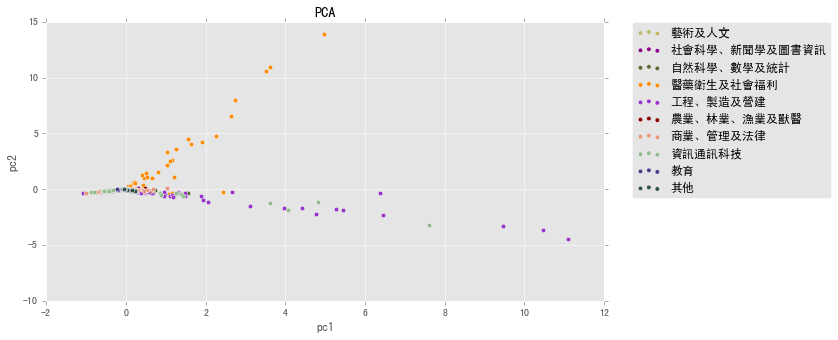

In [102]:
plt.figure(figsize=(10,5))
colors = color[35:45]
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r[y == i, 0], x_r[y == i, 1], lw=lw,c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PCA')
plt.xlabel('pc1')
plt.ylabel('pc2')
#plt.tight_layout()

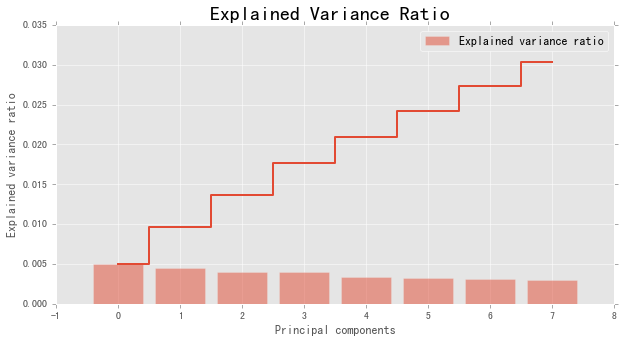

In [108]:
explained_variance_ratio = pca.explained_variance_ratio_
 
plt.figure(figsize=(10,5))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Explained variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title("Explained Variance Ratio ", fontsize=20)
plt.step(range(len(explained_variance_ratio)), np.cumsum(explained_variance_ratio), where='mid',label='cumulative explained variance')
 

1. 從PCA的圖中，除了醫療與工程的學院比較能看出明顯的分群外，其餘學院從圖中較難以分辨。
2. 從學院的散步可以證明pc1 的變異程度> pc2
3. 從Explained Variance Ratio 可以很簡單的看出pc1~pc8的解釋能力表現都不好，可看出此資料集做pca的效果並不是很好

## Q2.2
Visualize academic department using multiple dimensional scaling. Consdier both the metric and non-metric settings. Discuss the result.

In [109]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [110]:
mds = manifold.MDS()
pos = mds.fit_transform(X)

Text(0.5, 1.0, 'metric MSD')

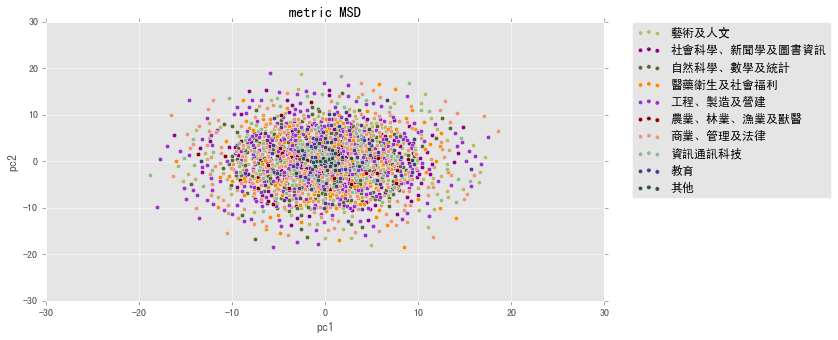

In [112]:
plt.figure(figsize=(10,5))
#colors =  ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray', 'navy']
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(pos[y == i, 0], pos[y == i, 1], lw=lw,label=target_name, c=c)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('metric MSD')

In [114]:
nmds = manifold.MDS(n_components=8)
npos = nmds.fit_transform(X)

Text(0.5, 1.0, 'non-metric MSD')

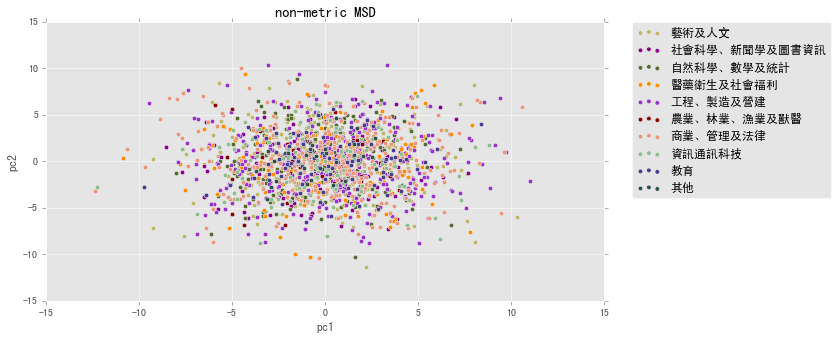

In [116]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(npos[y == i, 0], npos[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('non-metric MSD')

1. 比較MSD metric 與non-metric的結果可以發現metric pc1的變異程度比non-metric來得大
2. 但將維度後的分類效果皆沒有很顯著

# Q2.3
Visualize academic department using Locally Linear Embedding. Consider three variations:  (2) Use 40 neighbors to construct the weight matrix; (3) Perform PCA transformation first, and use the first 100 principle components as the input to LLE (with 20 neighbors). Discuss the result.

(1) Use 20 neighbors to construct the weight matrix

In [117]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_neighbors = 20)
x_r = embedding.fit_transform(X)

Text(0.5, 1.0, 'LLE using 20 neighbors')

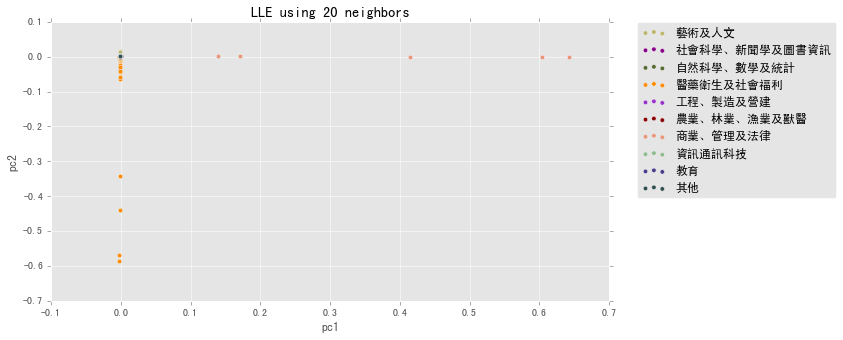

In [119]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r[y == i, 0], x_r[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('LLE using 20 neighbors')

(2) Use 40 neighbors to construct the weight matrix

In [120]:
embedding = LocallyLinearEmbedding(n_neighbors = 40)
x_r_2 = embedding.fit_transform(X)

Text(0.5, 1.0, 'LLE using 40 neighbors')

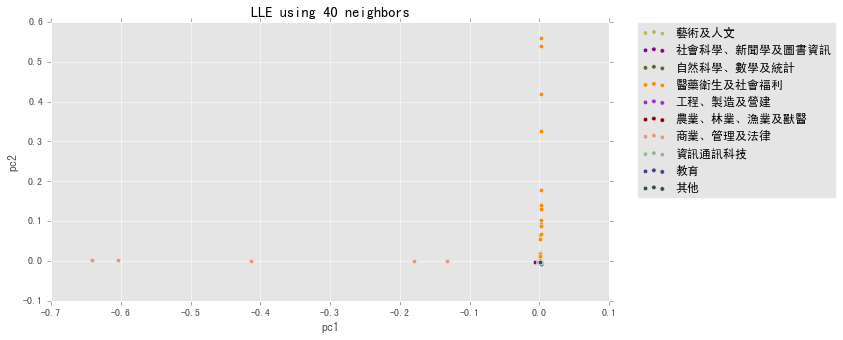

In [121]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_2[y == i, 0], x_r_2[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('LLE using 40 neighbors')

(3) Perform PCA transformation first, and use the first 100 principle components as the input to LLE (with 20 neighbors)

In [122]:
# pca first
pca = PCA(n_components = 100)
x_r_pca = pca.fit_transform(X)

In [124]:
embedding = LocallyLinearEmbedding(n_neighbors = 20)
x_r_3 = embedding.fit_transform(x_r_pca)

Text(0.5, 1.0, 'LLE using 20 neighbors with 100 pca')

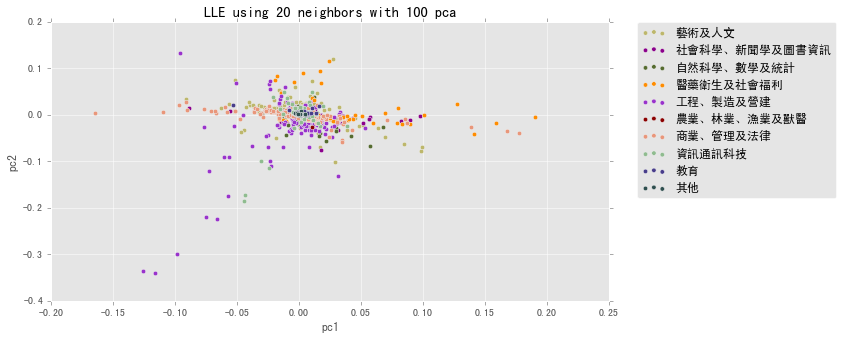

In [125]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_3[y == i, 0], x_r_3[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('LLE using 20 neighbors with 100 pca')

1. LLE 不管是在20個鄰居還是40個鄰居效果都不太好，而且比較耗時
2. pca 之後效率提升很多，與沒有pca相較起來分類效果比較好（雖然也還是不太好）

## Q2.4: 
Visualize academic department using Kernel PCA. You should at least consider the RBF and Cosine kernel. It is your responsibility to select reasonably good kernel parameters. Discuss the result.

(1) using RBF

In [126]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(kernel='rbf')
x_r_4 = transformer.fit_transform(X)

Text(0.5, 1.0, 'KernalPCA using RBF')

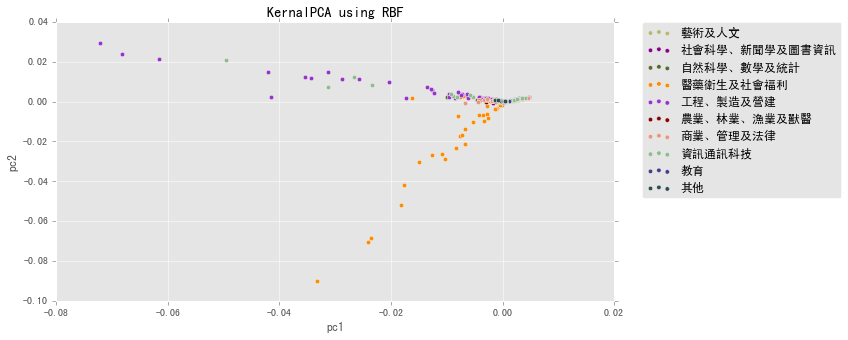

In [127]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_4[y == i, 0], x_r_4[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('KernalPCA using RBF')

(2) using cosine

In [128]:
transformer = KernelPCA(kernel='cosine')
x_r_5 = transformer.fit_transform(X)

Text(0.5, 1.0, 'KernalPCA using cosine')

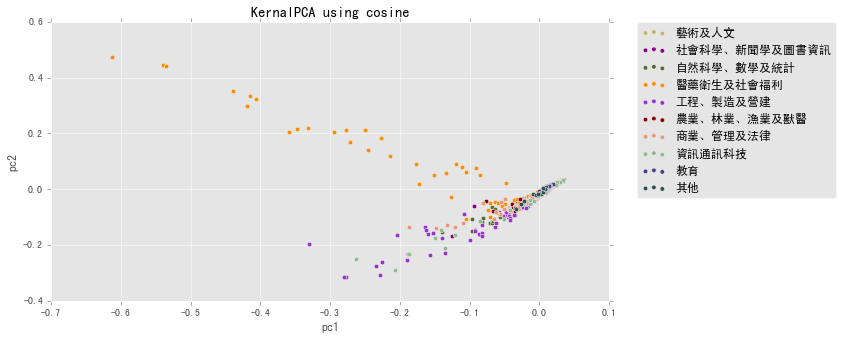

In [129]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_5[y == i, 0], x_r_5[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('KernalPCA using cosine')

1. kernal pca 使用RBF 與cosine的相似度結果沒有太大差異
2. 與pca相較，分類效果蠻類似的

## Q2.5: 
Visualize academic department using t-SNE. You should consider at least the Euclidian, Cosine, and Jaccard metric. Set numpy random seed so that your results can be repeated. Discuss the result.

In [130]:
seed = np.random.RandomState(seed=3)

In [ ]:
(1) using Euclidian

In [139]:
from sklearn.manifold import TSNE
x_r_6 = TSNE(metric="euclidean", random_state=seed).fit_transform(X)

Text(0.5, 1.0, 't-SNE using euclidean')

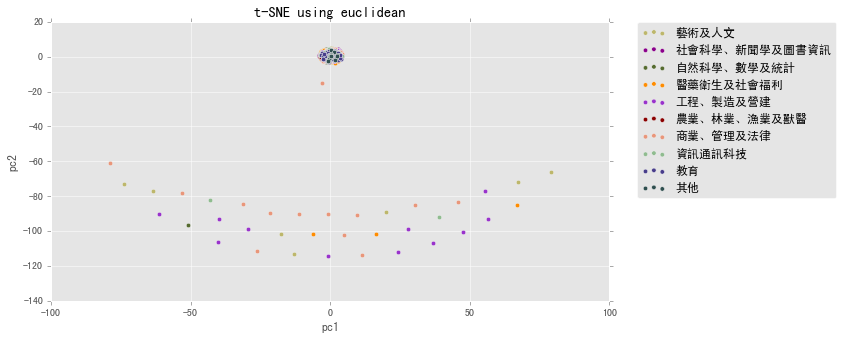

In [140]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_6[y == i, 0], x_r_6[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('t-SNE using euclidean')

(2) using cosine

In [141]:
x_r_7 = TSNE(metric="cosine", random_state=seed).fit_transform(X)

Text(0.5, 1.0, 't-SNE using cosine')

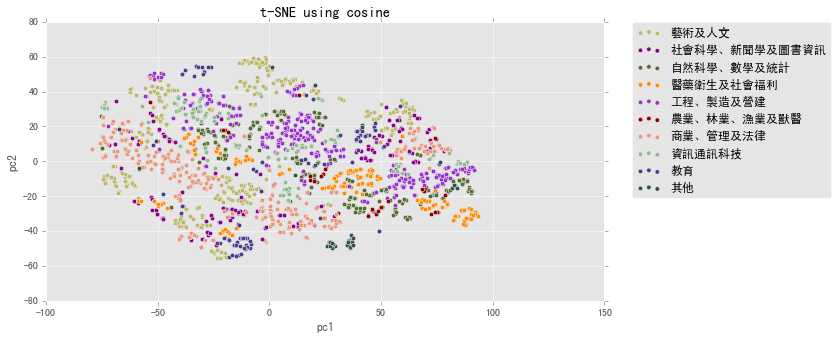

In [142]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_7[y == i, 0], x_r_7[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('t-SNE using cosine')

(2) using Jaccard

In [143]:
x_r_8 = TSNE(metric="jaccard", random_state=seed).fit_transform(X)

Text(0.5, 1.0, 't-SNE using Jaccard')

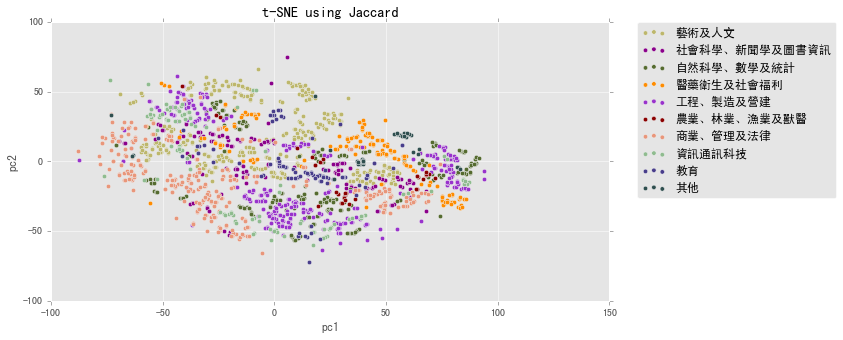

In [173]:
plt.figure(figsize=(10,5))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_8[y == i, 0], x_r_8[y == i, 1], lw=lw, c=c,
                label=target_name)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('t-SNE using Jaccard')

1. t-SNE 降維度後的分類效果是最好的
2. t-SNE 中又以cosine的距離計算方式分類較明顯
3. t-SNE 用euclidean畫的結果蠻有趣的，但還沒想到怎麼解釋

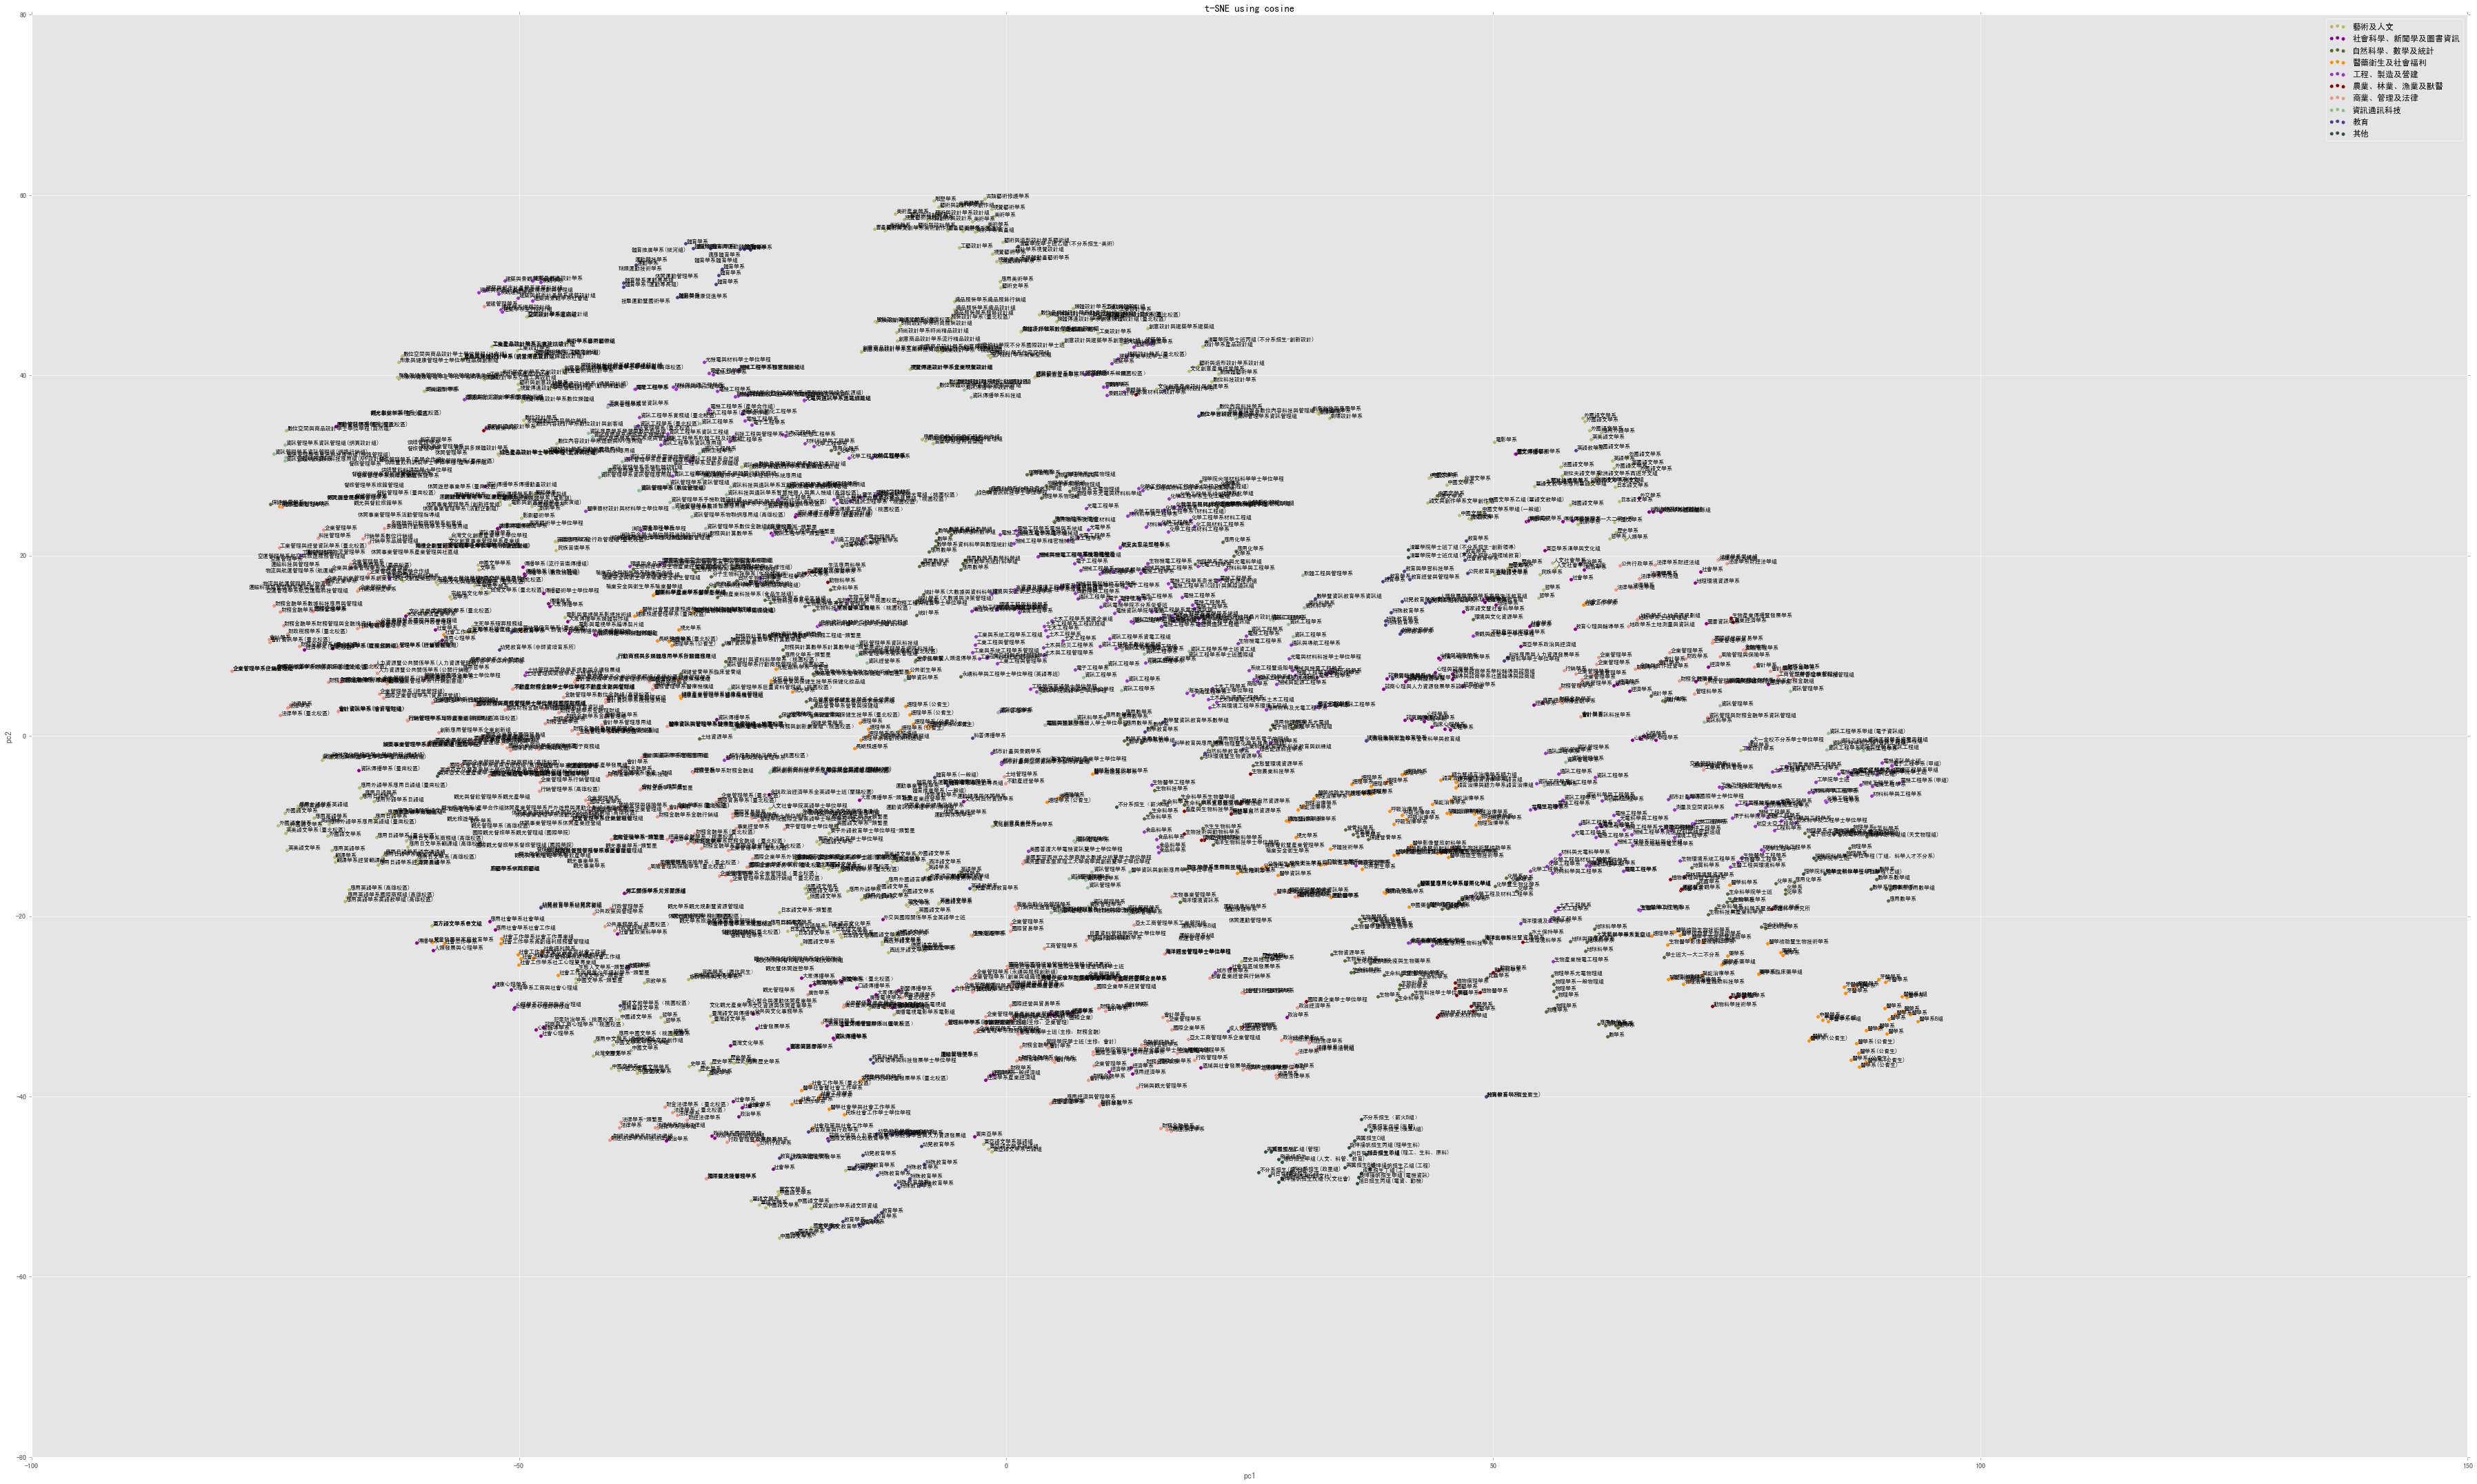

In [178]:
fig, ax = plt.subplots(figsize=(50,30))
lw = 0.5

for i, c, target_name in zip(target_index, colors, target_names):
    plt.scatter(x_r_7[y == i, 0], x_r_7[y == i, 1], lw=lw, c=c,
                label=target_name, s=30)
    
for i, txt in enumerate(df_copy['department_name']):
    ax.annotate(txt, (x_r_7[i,0]+0.1, x_r_7[i,1]+0.1), size=8 )
    
plt.legend()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('t-SNE using cosine')

plt.tight_layout()
plt.savefig('t-sne.png', dpi=200)